# Relative Frequency, Chebychev's bound, and Law of Large Numbers 
In this notebook we show empirically that the relative frequency for a Bernoulli random variable converges to the probability of success ($p = Pr[X_i=1]$) and compare the rate of convergence with the one given by Chebyshev's inequality

In [1]:
#importing some useful packages
#NumPy(http://www.numpy.org): useful for scientific computing, provides array objects, etc.
import numpy as np
#Matplotlib(https://matplotlib.org):  2D plotting library
import matplotlib.pyplot as plt
#package for random number generators and other useful "random" stuff
import random as rnd
#package with some default math functions
import math

The comments can also be in the notebook, **they may look better**

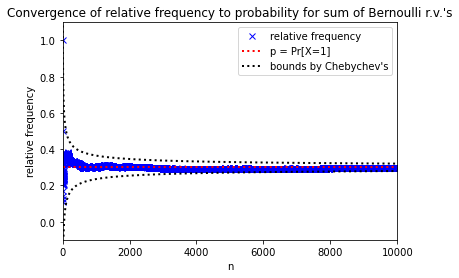

In [4]:
#the following is to have matplotlib graphs included in your notebook, next to the code
%matplotlib inline

#First: we compute the relative frequency for the series of i.i.d. Bernoulli r.v.

#parameter p of the Bernoulli r.v. B(p) (p=Pr[X=1])
p=0.3

#consider max_n B(p) r.v.'s
max_n = 10000

#generate random Bernoulli r.v.'s and then compute relative frequency. curr_sum
#will count the number of success after the trials
curr_sum = 0.0

#rel_freq_seq[i] = relative frequency of event "success" (i.e.,X=1) after i+1 trials
#initialize at 0
rel_freq_seq = np.zeros(max_n)

#curr_n[i] is the number of trials corresponding to index i in rel_freq_set, that is:
#curr_n[i]=i+1
#initialize at 0
curr_n = np.zeros(max_n)

#compute the bound given by Chebyshev's using fixed probability prob
prob = 0.05

#we use Chebychev to obtain an upper bound that holds with probability >= 1-prob on
#the number of successes
Cheby_upper_bound = np.zeros(max_n)

#analogously, we use Chebychev to obtain an upper bound that holds with
#probability >= 1-prob on the number of successes
Cheby_lower_bound = np.zeros(max_n)

for i in range(max_n):
    curr_n[i] = i+1.

    #simulate a Bernoulli random variable, we generate a random number between 0 and 1...
    rand_val = rnd.random()
    
    #...if the generated value is <=p...
    if rand_val <= p:
    
        #...then we say that we have a success. In this way, the probability of
        #success is exactly p (the parameter of the Bernoulli)
        curr_sum += 1.

    #update the relative frequency
    rel_freq_seq[i] = curr_sum / float(i+1)
    
    #compute the next point in the Chebychev bound
    Cheby_bound = math.sqrt(p*(1-p)/((i+1)*prob))
    
    #obtain the upper bound
    Cheby_upper_bound[i] = p+Cheby_bound
    
    #obtain the lower bound
    Cheby_lower_bound[i] = p-Cheby_bound


#now plot the relative frequency as a function of the number of r.v. considered
plt.plot(curr_n, rel_freq_seq,'xb')

#to obtain control on the axis of the figure, so to customize laberls, limits, etc.
ax1 = plt.gca()

#set limit on x-axis
ax1.set_xlim(0, max_n)

#set limit on y-axis
ax1.set_ylim(-0.1, 1.1)

#title of the plot
plt.title("Convergence of relative frequency to probability for sum of Bernoulli r.v.'s")

#label of x axis
plt.xlabel("n")

#label of y axis
plt.ylabel('relative frequency')

#now plot the correct value of p, just for reference
lines = plt.plot([0.0, max_n],[p, p],'r:')

#change the width of the plotted line
plt.setp(lines, linewidth=2)

#plot the values from Chebychev's upper bound
lines = plt.plot(curr_n,Cheby_upper_bound,'k:')

#change the width of the plotted line
plt.setp(lines, linewidth=2)

#plot the values from Chebychev's upper bound
lines = plt.plot(curr_n,Cheby_lower_bound,'k:')

#change the width of the plotted line
plt.setp(lines, linewidth=2)

#add the personalized legend
plt.legend(['relative frequency','p = Pr[X=1]','bounds by Chebychev\'s'])

#show the figure
plt.show()